<a href="https://colab.research.google.com/github/ejazfahil/Project_ML-/blob/main/FSF_Airport_Fog_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Imports and Read in Data

#Importing revelant libraries and installing facets for visualisation
import pandas as pd  #gestione dati tabellari
import matplotlib.pyplot as plt
from numpy import*  # gestione di matrici
from sklearn import*  #lib di base per la gestione di fnzioni di machine learning
import tensorflow as tf #li machine learnig deep learing fatta da google
from tensorflow import keras #sottolibreria ML
import numpy as np


# sklearn encoding, data preparation and evaluation tools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Keras (2.X on - I used 2.7 but the below should work for any version.)
from keras.layers import Dense, SpatialDropout3D
from keras.models import Sequential

seed = 1
# fix random seed for reproducibility
np.random.seed(seed)

# Some matplotlib figure sizes
plt.rcParams["figure.figsize"] = (12,8)


# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

In [2]:
# Install a specific version of NumPy (before 1.20)
!pip install numpy
# Install other necessary libraries
!pip install pandas matplotlib facets-overview ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00


In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Importing Libraries
import os  # Operating system module
import warnings  # Warnings module
import pandas as pd  # Pandas for data manipulation
import numpy as np  # Numpy for numerical computations
import seaborn as sns  # Seaborn for data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
from sklearn import metrics  # Metrics module from scikit-learn
from sklearn.decomposition import PCA  # Principal Component Analysis from scikit-learn
from imblearn.over_sampling import SMOTE  # SMOTE for oversampling
from sklearn.feature_selection import RFE  # Recursive Feature Elimination from scikit-learn
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV, GridSearchCV, cross_validate  # Cross-validation utilities from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error, auc, roc_auc_score, roc_curve, recall_score  # Various evaluation metrics from scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Preprocessing utilities from scikit-learn
from sklearn.linear_model import LogisticRegression  # Logistic Regression model from scikit-learn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest and Gradient Boosting classifiers from scikit-learn
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier from scikit-learn
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance Inflation Factor from statsmodels
!pip install -q streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [5]:

# Set display options
pd.set_option('display.max_rows', 100)  # Maximum number of rows to display
pd.set_option('display.max_columns', 400)  # Maximum number of columns to display

### AIRPORT **FOGG DETECTION**

IMPORTING DATASET

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
trapani_df = pd.read_excel('/content/Trapani airport.xlsx')
grazzanise_df = pd.read_excel('/content/Grazzanise airport.xlsx')
treviso_df = pd.read_excel('/content/Treviso airport.xlsx')




Trapani columns: Index(['date', 'idstazione', 'lon', 'lat', 'altezza', 'pressure',
       'three_hour_pressure_change', 'char_pressure_tendency',
       'wind_direction', 'wind_speed', 'relative_humidity', 'visibility',
       'present_weather', 'past_weather1', 'past_weather2', 'cloud_cover',
       'height_of_base_of_cloud', 'cloud_type', 'drybulb', 'dewpoint'],
      dtype='object')
Grazzanise columns: Index(['date', 'idstazione', 'lon', 'lat', 'altezza', 'pressure',
       'three_hour_pressure_change', 'char_pressure_tendency',
       'wind_direction', 'wind_speed', 'relative_humidity', 'visibility',
       'present_weather', 'past_weather1', 'past_weather2', 'cloud_cover',
       'height_of_base_of_cloud', 'cloud_type', 'drybulb', 'dewpoint'],
      dtype='object')
Treviso columns: Index(['date', 'idstazione', 'lon', 'lat', 'altezza', 'pressure',
       'three_hour_pressure_change', 'char_pressure_tendency',
       'wind_direction', 'wind_speed', 'relative_humidity', 'visibility',

In [38]:


#new

# Inspect the columns to identify the date column
print("Trapani columns:", trapani_df.columns)
print("Grazzanise columns:", grazzanise_df.columns)
print("Treviso columns:", treviso_df.columns)

Trapani columns: Index(['date', 'idstazione', 'lon', 'lat', 'altezza', 'pressure',
       'three_hour_pressure_change', 'char_pressure_tendency',
       'wind_direction', 'wind_speed', 'relative_humidity', 'visibility',
       'present_weather', 'past_weather1', 'past_weather2', 'cloud_cover',
       'height_of_base_of_cloud', 'cloud_type', 'drybulb', 'dewpoint'],
      dtype='object')
Grazzanise columns: Index(['date', 'idstazione', 'lon', 'lat', 'altezza', 'pressure',
       'three_hour_pressure_change', 'char_pressure_tendency',
       'wind_direction', 'wind_speed', 'relative_humidity', 'visibility',
       'present_weather', 'past_weather1', 'past_weather2', 'cloud_cover',
       'height_of_base_of_cloud', 'cloud_type', 'drybulb', 'dewpoint'],
      dtype='object')
Treviso columns: Index(['date', 'idstazione', 'lon', 'lat', 'altezza', 'pressure',
       'three_hour_pressure_change', 'char_pressure_tendency',
       'wind_direction', 'wind_speed', 'relative_humidity', 'visibility',

In [39]:
# Convert the date column to datetime
trapani_df['date'] = pd.to_datetime(trapani_df['date'], errors='coerce', format='%d/%m/%Y %H:%M')
grazzanise_df['date'] = pd.to_datetime(grazzanise_df['date'], errors='coerce', format='%d/%m/%Y %H:%M')
treviso_df['date'] = pd.to_datetime(treviso_df['date'], errors='coerce', format='%d/%m/%Y %H:%M')

# Drop rows where date conversion failed
trapani_df.dropna(subset=['date'], inplace=True)
grazzanise_df.dropna(subset=['date'], inplace=True)
treviso_df.dropna(subset=['date'], inplace=True)

column after 2013

In [40]:
# Filter out records before 2013
trapani_df = trapani_df[trapani_df['date'] >= '2013-01-01']
grazzanise_df = grazzanise_df[grazzanise_df['date'] >= '2013-01-01']
treviso_df = treviso_df[treviso_df['date'] >= '2013-01-01']

Set date column as Index & Resample

In [41]:
# Set the date column as the index and resample to daily frequency
trapani_df.set_index('date', inplace=True)
grazzanise_df.set_index('date', inplace=True)
treviso_df.set_index('date', inplace=True)

trapani_daily = trapani_df.resample('D').mean()
grazzanise_daily = grazzanise_df.resample('D').mean()
treviso_daily = treviso_df.resample('D').mean()

Data Overview and Cleaning

In [42]:
# Check for missing values
trapani_missing = trapani_df.isnull().sum()
grazzanise_missing = grazzanise_df.isnull().sum()
treviso_missing = treviso_df.isnull().sum()

trapani_missing, grazzanise_missing, treviso_missing

(idstazione                        0
 lon                               0
 lat                               0
 altezza                           0
 pressure                         14
 three_hour_pressure_change      113
 char_pressure_tendency          112
 wind_direction                    2
 wind_speed                        2
 relative_humidity             84618
 visibility                        0
 present_weather                   2
 past_weather1                     4
 past_weather2                     2
 cloud_cover                       3
 height_of_base_of_cloud       19114
 cloud_type                        0
 drybulb                        5818
 dewpoint                       5819
 dtype: int64,
 idstazione                        0
 lon                               0
 lat                               0
 altezza                           0
 pressure                          4
 three_hour_pressure_change      160
 char_pressure_tendency          160
 wind_direction        

Renaming

In [37]:
# Rename the date column if it exists with a different name
def rename_date_column(df, dataset_name):
    if 'date' not in df.columns:
        for col in df.columns:
            if 'date' in col.lower():
                df.rename(columns={col: 'date'}, inplace=True)
                print(f"'date' column found and renamed in {dataset_name}")
                return
        print(f"No 'date' column found in {dataset_name}")

rename_date_column(trapani_df, 'Trapani')
rename_date_column(grazzanise_df, 'Grazzanise')
rename_date_column(treviso_df, 'Treviso')

Handling Missing Values

In [43]:
# Handle missing values using interpolation
trapani_daily.interpolate(method='linear', inplace=True)
grazzanise_daily.interpolate(method='linear', inplace=True)
treviso_daily.interpolate(method='linear', inplace=True)

In [44]:
# Get summary statistics for each dataset
trapani_summary = trapani_daily.describe()
grazzanise_summary = grazzanise_daily.describe()
treviso_summary = treviso_daily.describe()

print(trapani_summary)
print(grazzanise_summary)
print(treviso_summary)

       idstazione          lon          lat  altezza       pressure  \
count      3974.0  3974.000000  3974.000000   3974.0    3974.000000   
mean      16429.0    12.498483    37.918483      9.0  101511.566918   
std           0.0     0.003584     0.003584      0.0     587.345837   
min       16429.0    12.490000    37.910000      9.0   98577.500000   
25%       16429.0    12.500000    37.920000      9.0  101185.937500   
50%       16429.0    12.500000    37.920000      9.0  101474.166667   
75%       16429.0    12.500000    37.920000      9.0  101829.270833   
max       16429.0    12.500000    37.920000      9.0  103441.666667   

       three_hour_pressure_change  char_pressure_tendency  wind_direction  \
count                 3974.000000             3974.000000     3974.000000   
mean                     1.871109                4.071217      199.982314   
std                     46.244140                0.983373       57.060124   
min                   -254.166667                1.2

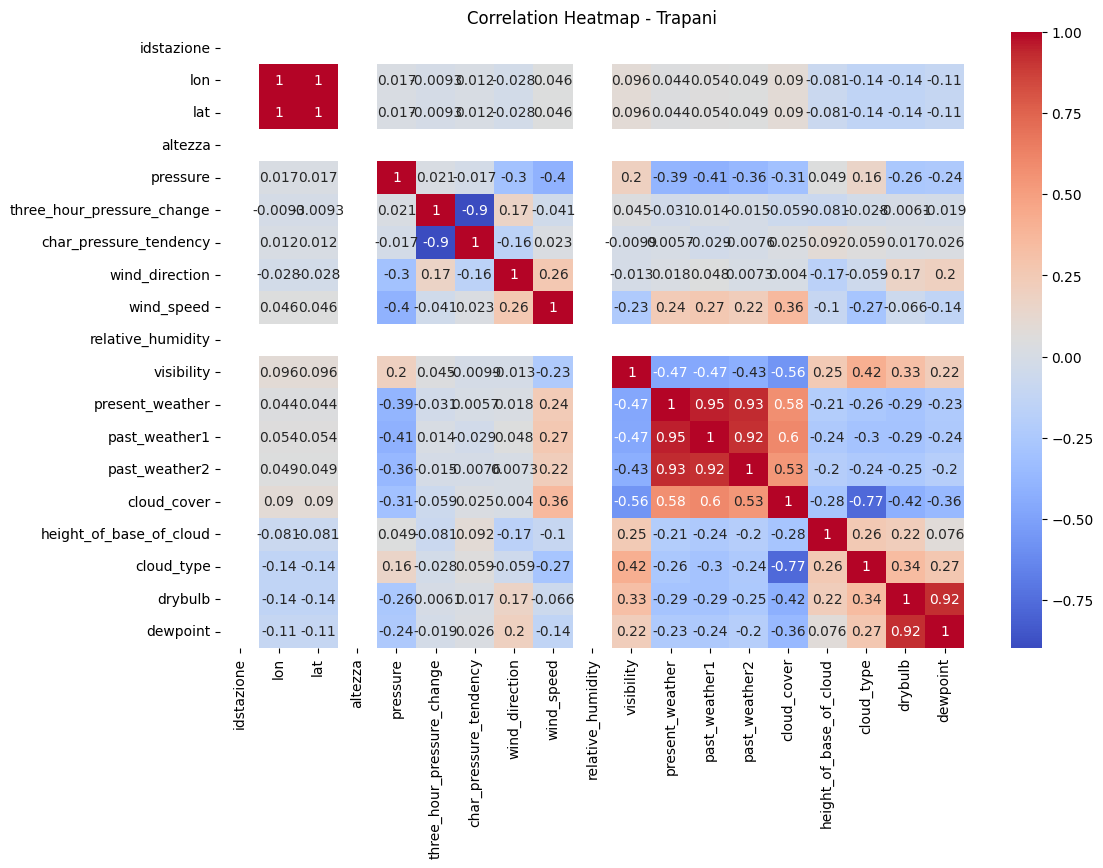

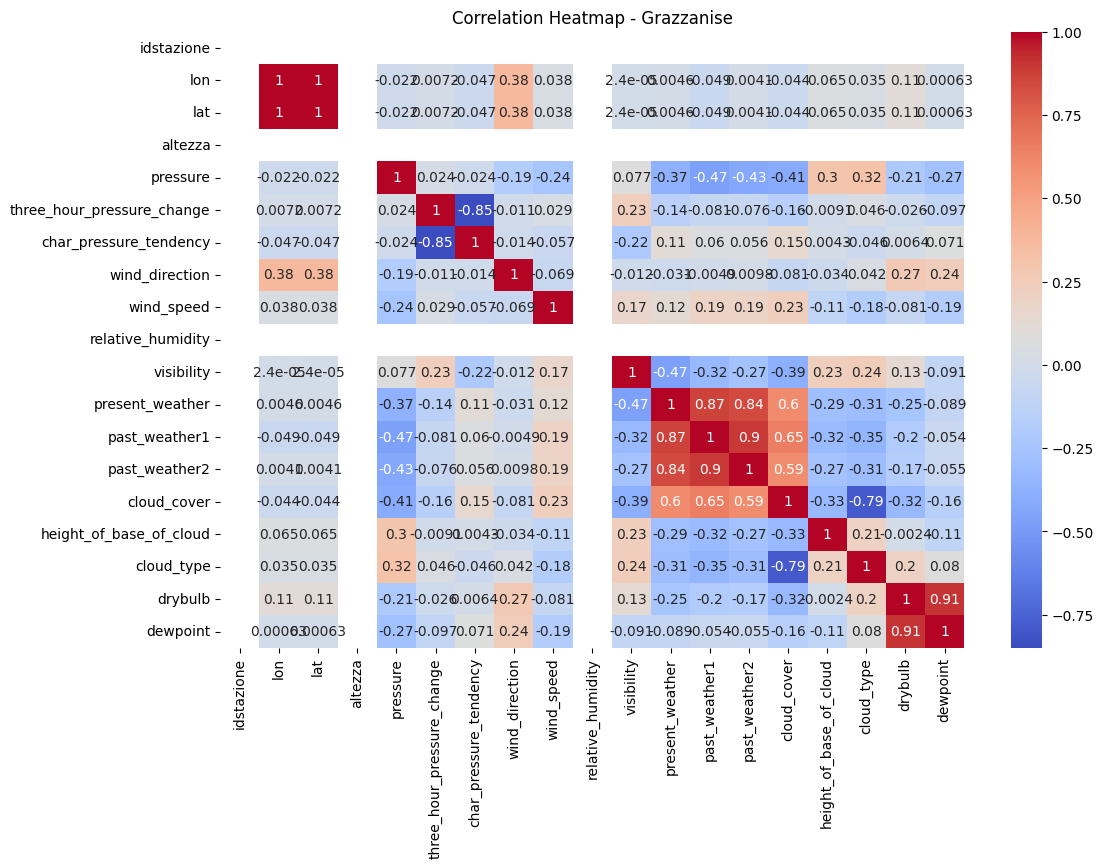

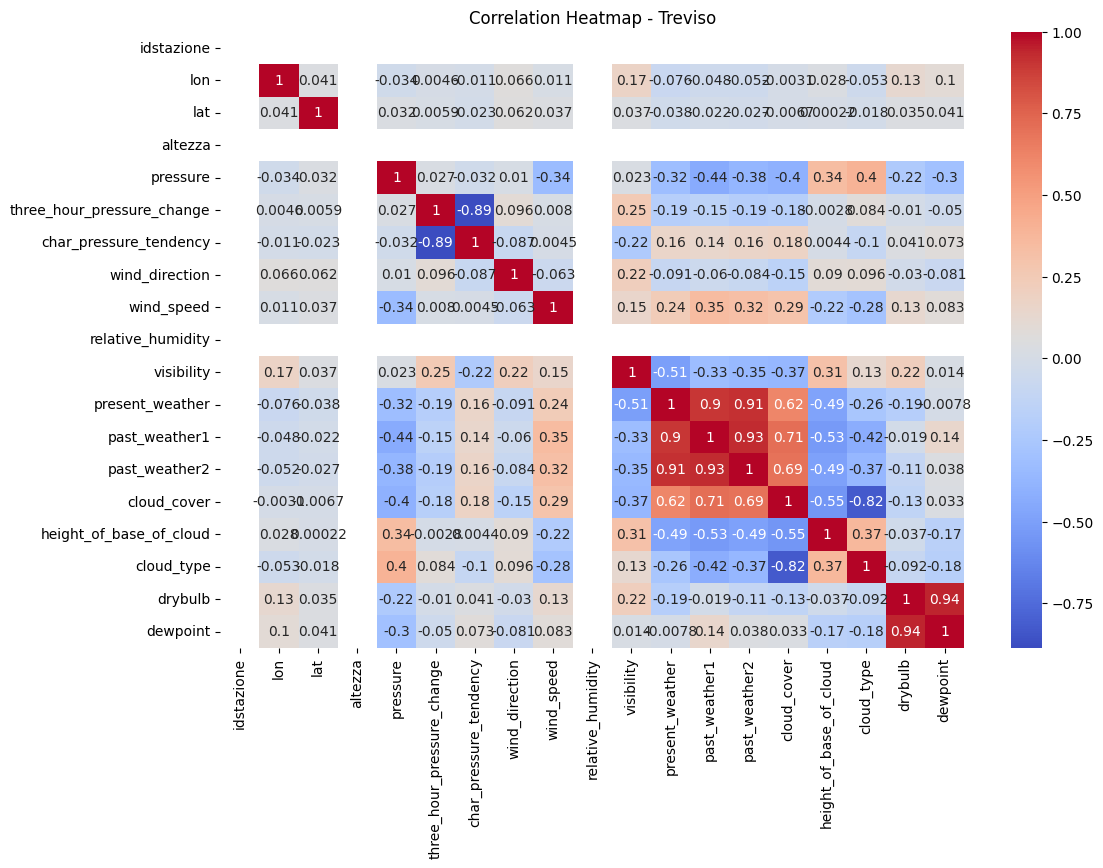

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap for Trapani
plt.figure(figsize=(12, 8))
sns.heatmap(trapani_daily.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Trapani')
plt.show()

# Correlation heatmap for Grazzanise
plt.figure(figsize=(12, 8))
sns.heatmap(grazzanise_daily.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Grazzanise')
plt.show()

# Correlation heatmap for Treviso
plt.figure(figsize=(12, 8))
sns.heatmap(treviso_daily.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Treviso')
plt.show()

Feature Selection

In [49]:
# Identify important features for each dataset
important_features_trapani = trapani_daily.corr()['drybulb'].sort_values(ascending=False)
important_features_grazzanise = grazzanise_daily.corr()['drybulb'].sort_values(ascending=False)
important_features_treviso = treviso_daily.corr()['drybulb'].sort_values(ascending=False)

print("Important features for Trapani:", important_features_trapani)
print("Important features for Grazzanise:", important_features_grazzanise)
print("Important features for Treviso:", important_features_treviso)

Important features for Trapani: drybulb                       1.000000
dewpoint                      0.921676
cloud_type                    0.342885
visibility                    0.325375
height_of_base_of_cloud       0.219323
wind_direction                0.165926
char_pressure_tendency        0.016977
three_hour_pressure_change   -0.006143
wind_speed                   -0.065975
lon                          -0.137521
lat                          -0.137521
past_weather2                -0.247619
pressure                     -0.255472
present_weather              -0.288314
past_weather1                -0.294397
cloud_cover                  -0.421393
idstazione                         NaN
altezza                            NaN
relative_humidity                  NaN
Name: drybulb, dtype: float64
Important features for Grazzanise: drybulb                       1.000000
dewpoint                      0.910935
wind_direction                0.271698
cloud_type                    0.199393
visibi

In [50]:
# Split the data into train and test sets
train_trapani = trapani_daily['visibility'][:int(0.8*len(trapani_daily))]
test_trapani = trapani_daily['visibility'][int(0.8*len(trapani_daily)):]

train_grazzanise = grazzanise_daily['visibility'][:int(0.8*len(grazzanise_daily))]
test_grazzanise = grazzanise_daily['visibility'][int(0.8*len(grazzanise_daily)):]

train_treviso = treviso_daily['visibility'][:int(0.8*len(treviso_daily))]
test_treviso = treviso_daily['visibility'][int(0.8*len(treviso_daily)):]

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model for Trapani
model_trapani = ARIMA(train_trapani, order=(5, 1, 0))  # Example order, should be tuned
model_fit_trapani = model_trapani.fit()

# Fit the ARIMA model for Grazzanise
model_grazzanise = ARIMA(train_grazzanise, order=(5, 1, 0))  # Example order, should be tuned
model_fit_grazzanise = model_grazzanise.fit()

# Fit the ARIMA model for Treviso
model_treviso = ARIMA(train_treviso, order=(5, 1, 0))  # Example order, should be tuned
model_fit_treviso = model_treviso.fit()

Model Evaluation

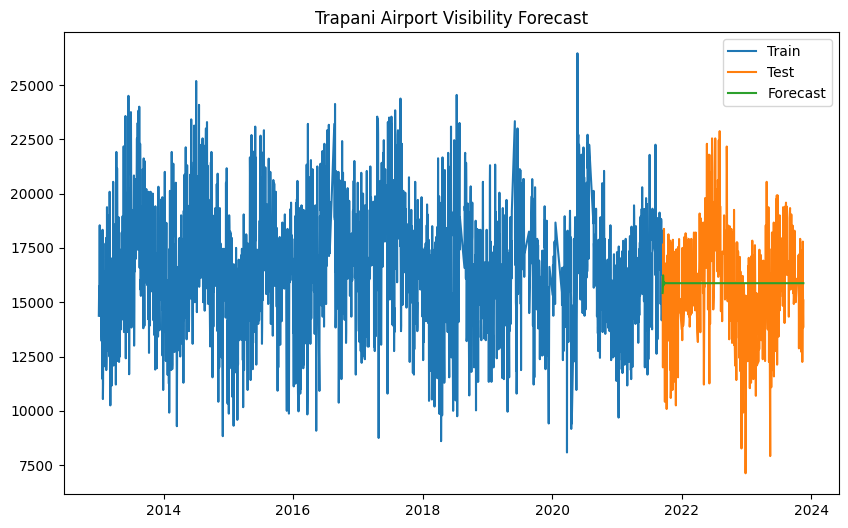

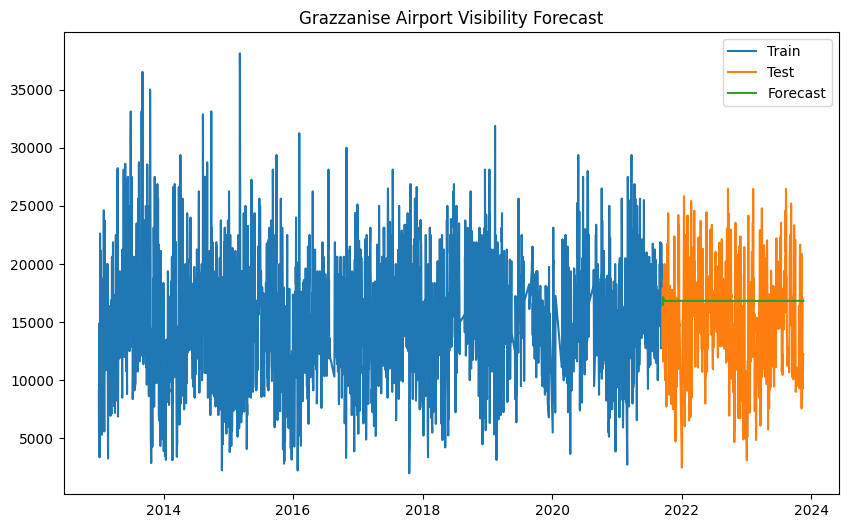

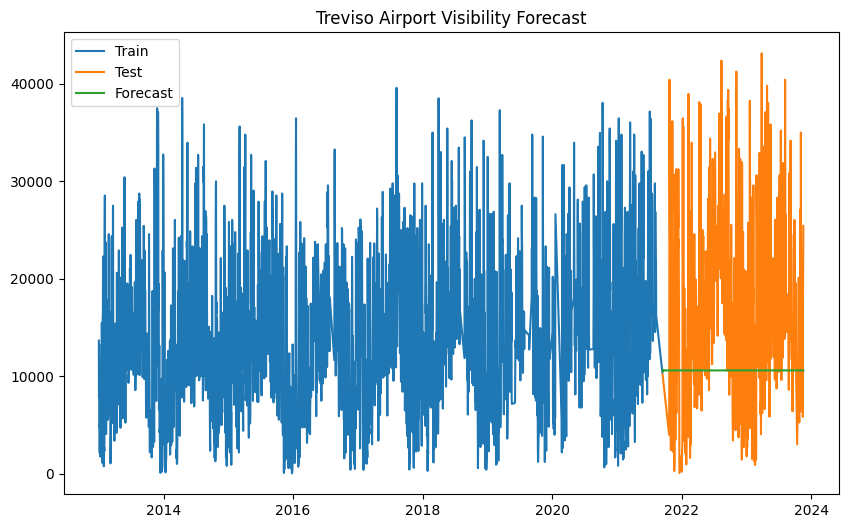

Trapani RMSE: 2173.2451943666433
Grazzanise RMSE: 4826.398440243035
Treviso RMSE: 10731.329518965938


In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Forecast for Trapani
forecast_trapani = model_fit_trapani.forecast(steps=len(test_trapani))

# Forecast for Grazzanise
forecast_grazzanise = model_fit_grazzanise.forecast(steps=len(test_grazzanise))

# Forecast for Treviso
forecast_treviso = model_fit_treviso.forecast(steps=len(test_treviso))

# Plot the results for Trapani
plt.figure(figsize=(10, 6))
plt.plot(train_trapani, label='Train')
plt.plot(test_trapani, label='Test')
plt.plot(test_trapani.index, forecast_trapani, label='Forecast')
plt.legend()
plt.title('Trapani Airport Visibility Forecast')
plt.show()

# Plot the results for Grazzanise
plt.figure(figsize=(10, 6))
plt.plot(train_grazzanise, label='Train')
plt.plot(test_grazzanise, label='Test')
plt.plot(test_grazzanise.index, forecast_grazzanise, label='Forecast')
plt.legend()
plt.title('Grazzanise Airport Visibility Forecast')
plt.show()

# Plot the results for Treviso
plt.figure(figsize=(10, 6))
plt.plot(train_treviso, label='Train')
plt.plot(test_treviso, label='Test')
plt.plot(test_treviso.index, forecast_treviso, label='Forecast')
plt.legend()
plt.title('Treviso Airport Visibility Forecast')
plt.show()

# Calculate the RMSE for each airport
rmse_trapani = mean_squared_error(test_trapani, forecast_trapani, squared=False)
rmse_grazzanise = mean_squared_error(test_grazzanise, forecast_grazzanise, squared=False)
rmse_treviso = mean_squared_error(test_treviso, forecast_treviso, squared=False)

print(f'Trapani RMSE: {rmse_trapani}')
print(f'Grazzanise RMSE: {rmse_grazzanise}')
print(f'Treviso RMSE: {rmse_treviso}')

Forecasting

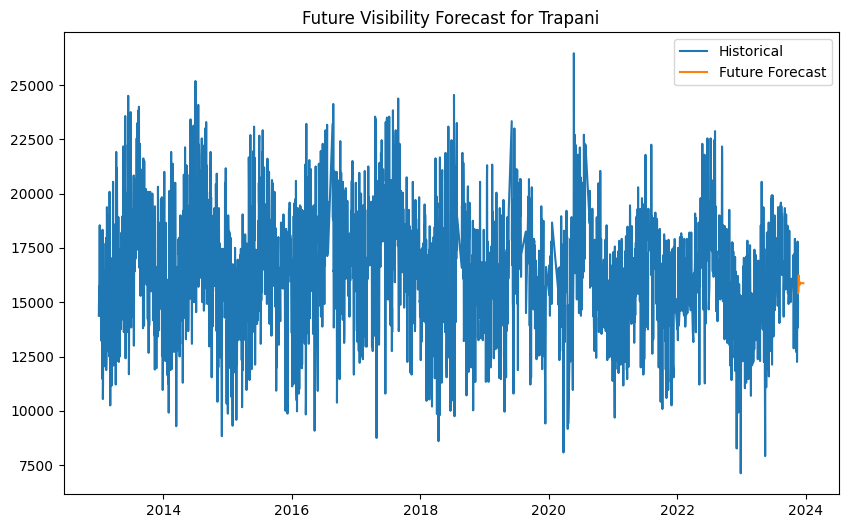

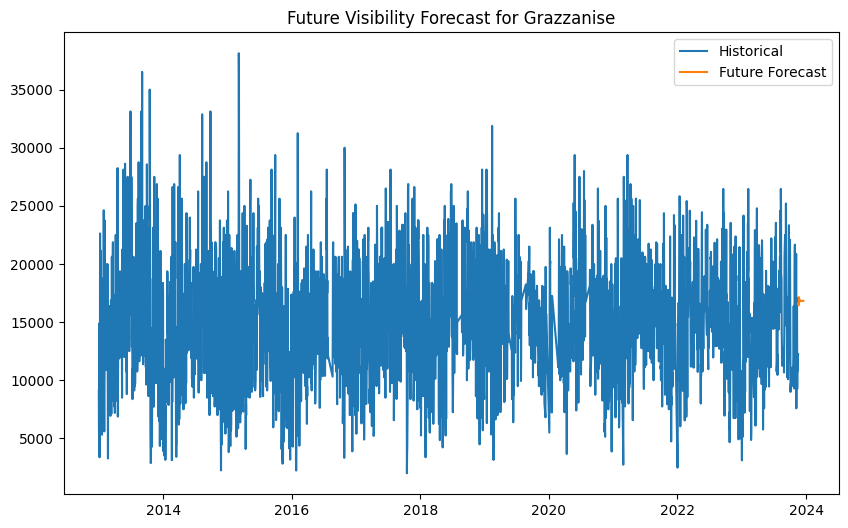

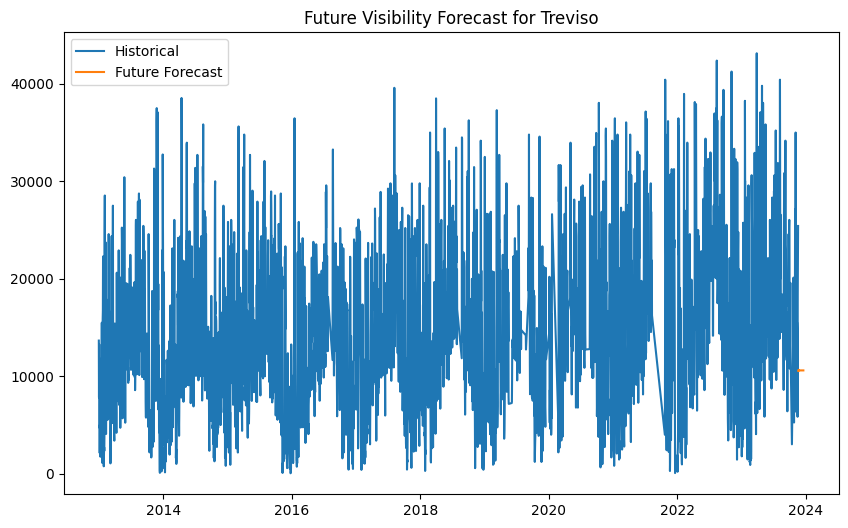

In [53]:
# Forecast for the next 30 days for Trapani
future_forecast_trapani = model_fit_trapani.forecast(steps=30)

# Forecast for the next 30 days for Grazzanise
future_forecast_grazzanise = model_fit_grazzanise.forecast(steps=30)

# Forecast for the next 30 days for Treviso
future_forecast_treviso = model_fit_treviso.forecast(steps=30)

# Plot future forecast for Trapani
plt.figure(figsize=(10, 6))
plt.plot(trapani_daily['visibility'], label='Historical')
plt.plot(pd.date_range(start=trapani_daily.index[-1], periods=31, freq='D')[1:], future_forecast_trapani, label='Future Forecast')
plt.legend()
plt.title('Future Visibility Forecast for Trapani')
plt.show()

# Plot future forecast for Grazzanise
plt.figure(figsize=(10, 6))
plt.plot(grazzanise_daily['visibility'], label='Historical')
plt.plot(pd.date_range(start=grazzanise_daily.index[-1], periods=31, freq='D')[1:], future_forecast_grazzanise, label='Future Forecast')
plt.legend()
plt.title('Future Visibility Forecast for Grazzanise')
plt.show()

# Plot future forecast for Treviso
plt.figure(figsize=(10, 6))
plt.plot(treviso_daily['visibility'], label='Historical')
plt.plot(pd.date_range(start=treviso_daily.index[-1], periods=31, freq='D')[1:], future_forecast_treviso, label='Future Forecast')
plt.legend()
plt.title('Future Visibility Forecast for Treviso')
plt.show()

Using SARIMA

In [58]:
!pip install pmdarima
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00


In [59]:
# Split the data into train and test sets
train_trapani = trapani_daily['visibility'][:int(0.8*len(trapani_daily))]
test_trapani = trapani_daily['visibility'][int(0.8*len(trapani_daily)):]

train_grazzanise = grazzanise_daily['visibility'][:int(0.8*len(grazzanise_daily))]
test_grazzanise = grazzanise_daily['visibility'][int(0.8*len(grazzanise_daily)):]

train_treviso = treviso_daily['visibility'][:int(0.8*len(treviso_daily))]
test_treviso = treviso_daily['visibility'][int(0.8*len(treviso_daily)):]

In [ ]:
# Use auto_arima to find the best SARIMA parameters for Trapani
auto_model_trapani = auto_arima(train_trapani, seasonal=True, m=12, stepwise=True, trace=True)
model_fit_sarima_trapani = auto_model_trapani.fit(train_trapani)
forecast_sarima_trapani = model_fit_sarima_trapani.predict(n_periods=len(test_trapani))

# Plot the results for Trapani
plt.figure(figsize=(10, 6))
plt.plot(train_trapani, label='Train')
plt.plot(test_trapani, label='Test')
plt.plot(test_trapani.index, forecast_sarima_trapani, label='SARIMA Forecast')
plt.legend()
plt.title('Trapani Airport Visibility Forecast with SARIMA')
plt.show()

# Calculate the RMSE for Trapani
rmse_sarima_trapani = mean_squared_error(test_trapani, forecast_sarima_trapani, squared=False)
print(f'Trapani SARIMA RMSE: {rmse_sarima_trapani}')

# Repeat the process for Grazzanise
auto_model_grazzanise = auto_arima(train_grazzanise, seasonal=True, m=12, stepwise=True, trace=True)
model_fit_sarima_grazzanise = auto_model_grazzanise.fit(train_grazzanise)
forecast_sarima_grazzanise = model_fit_sarima_grazzanise.predict(n_periods=len(test_grazzanise))

plt.figure(figsize=(10, 6))
plt.plot(train_grazzanise, label='Train')
plt.plot(test_grazzanise, label='Test')
plt.plot(test_grazzanise.index, forecast_sarima_grazzanise, label='SARIMA Forecast')
plt.legend()
plt.title('Grazzanise Airport Visibility Forecast with SARIMA')
plt.show()

rmse_sarima_grazzanise = mean_squared_error(test_grazzanise, forecast_sarima_grazzanise, squared=False)
print(f'Grazzanise SARIMA RMSE: {rmse_sarima_grazzanise}')

# Repeat the process for Treviso
auto_model_treviso = auto_arima(train_treviso, seasonal=True, m=12, stepwise=True, trace=True)
model_fit_sarima_treviso = auto_model_treviso.fit(train_treviso)
forecast_sarima_treviso = model_fit_sarima_treviso.predict(n_periods=len(test_treviso))

plt.figure(figsize=(10, 6))
plt.plot(train_treviso, label='Train')
plt.plot(test_treviso, label='Test')
plt.plot(test_treviso.index, forecast_sarima_treviso, label='SARIMA Forecast')
plt.legend()
plt.title('Treviso Airport Visibility Forecast with SARIMA')
plt.show()

rmse_sarima_treviso = mean_squared_error(test_treviso, forecast_sarima_treviso, squared=False)
print(f'Treviso SARIMA RMSE: {rmse_sarima_treviso}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=57945.641, Time=14.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=59040.965, Time=0.29 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=58644.425, Time=4.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=58156.888, Time=13.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=59038.965, Time=0.20 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=57941.797, Time=36.99 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=57941.642, Time=1.32 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=57943.641, Time=3.93 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=57939.306, Time=2.65 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=57941.537, Time=6.36 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=57941.302, Time=7.60 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=57943.537, Time=8.39 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=57959.999, Time=3.82 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=57945.348, Time=1.02 sec
 A